## Observations and Insights 

Observations:

1.	From the pie chart which shows gender distribution of the mice, it is made evident that the mice population is nearly even split with female(49.4%) and male(50.6%) mice.  This helps mitigate possible gender biases in the data. 
2.	By the Quartiles Analysis of tumor volume gives insight on the effectiveness of the drug regimen. From this analysis it is evident that Ceftamin and Infubinol are preforming worse than Ramicane and Capomulin. This observation is based on the fact that Ceftamin and Infubinol both have high quartile ranges while Ramicane and Capomulin are a lot lower meaning that the tumor size at the end of treatment is much smaller meaning that the drug regimen worked better.
3.	The box plot confirms what I described above in visual form. As you can see Infubinol and Ceftamin have much higher tumor volumes than Ramicane and Capomulin.
4.	The scatter plot gives an example shows that for the given mouse in the Capomulin drug regimen, its tumor volume decreases consistently over time and nearly reduces to nothing. Again confirming the success of Capomulin as a drug regimen for this tumor. 
5. The scatter plot shows that the heavy the mouse, the larger the tumor volume with a correlation of 0.84. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as lineregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Drop any duplicate rows
merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice
merge_df["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
grouped_summary_df = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

#format table
renamed_summary_df = grouped_summary_df.rename(columns={"mean":"Mean", "median":"Median", "var":"Variance", "std":"Standard Devation", "sem":"Standard Error of Mean"})
renamed_summary_df

Tumor Volume (mm3)                                          \
                           Mean     Median   Variance Standard Devation   
Drug Regimen                                                              
Capomulin             40.675741  41.557809  24.947764          4.994774   
Ceftamin              52.591172  51.776157  39.290177          6.268188   
Infubinol             52.884795  51.820584  43.128684          6.567243   
Ketapril              55.235638  53.698743  68.553577          8.279709   
Naftisol              54.331565  52.509285  66.173479          8.134708   
Placebo               54.033581  52.288934  61.168083          7.821003   
Propriva              52.322552  50.854632  42.351070          6.507770   
Ramicane              40.216745  40.673236  23.486704          4.846308   
Stelasyn              54.233149  52.431737  59.450562          7.710419   
Zoniferol             53.236507  51.818479  48.533355          6.966589   

                                     
             Standard Error of Mean  
Drug Regimen                         
Capomulin                  0.329346  
Ceftamin                   0.469821  
Infubinol                  0.492236  
Ketapril                   0.603860  
Naftisol                   0.596466  
Placebo                    0.581331  
Propriva                   0.512884  
Ramicane                   0.320955  
Stelasyn                   0.573111  
Zoniferol                  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


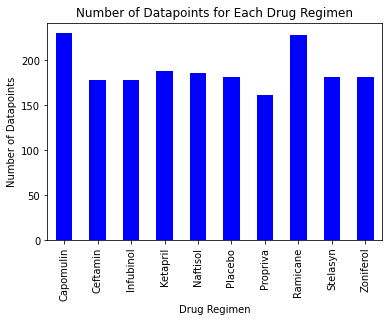

In [7]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
regimen_datapoints = merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_datapoints.plot(kind="bar", color="b")
print(regimen_datapoints)
# Format
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")
plt.title("Number of Datapoints for Each Drug Regimen")
plt.savefig("../Images/BarChart1.png")

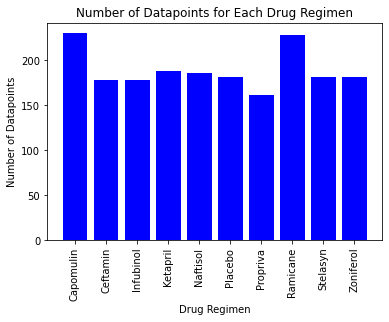

In [8]:
# General identical bar plot using pyplot instead of pandas.
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drug_regimen_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(drug_regimen_count))

# Create a bar chart based upon the above data
plt.bar(x_axis, drug_regimen_count, color="b", align="center")

#formatting
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")
plt.title("Number of Datapoints for Each Drug Regimen") 
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation="vertical")
plt.savefig("../Images/BarChart2.png")

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64


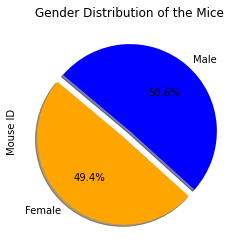

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = merge_df.groupby(["Sex"]).count()["Mouse ID"]
print(gender_grouped)
colors = ["orange", "blue"]
plot = gender_grouped.plot.pie(y="Mouse ID",explode = (0.1, 0), colors = colors, shadow = True, autopct="%1.1f%%", startangle=140)
# Format
plt.title("Gender Distribution of the Mice")
plt.savefig("../Images/PieChart1.png")

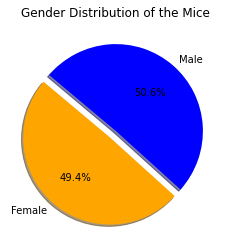

In [10]:
# Generate identical pie plot using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [49.4,50.6]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Format
plt.title("Gender Distribution of the Mice")
plt.savefig("../Images/PieChart2.png")

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top_four_regimen = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin") | (merge_df["Drug Regimen"] == "Ramicane") | (merge_df["Drug Regimen"] == "Infubinol") | (merge_df["Drug Regimen"] == "Ceftamin")]

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
# Sort by Timpepoints to get teh greatest timepoints at the top for each mouse
top_four_regimen = top_four_regimen.sort_values("Timepoint", ascending = False)

# Drop duplicates but keep first value for each mouse which should be greated timpoint
top_four_regimen = top_four_regimen.drop_duplicates(subset="Mouse ID", keep='first')
top_four_regimen
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [12]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = top_four_regimen.loc[top_four_regimen["Drug Regimen"] == "Capomulin",:]
ramicane_df = top_four_regimen.loc[top_four_regimen["Drug Regimen"] == "Ramicane", :]
infubinol_df = top_four_regimen.loc[top_four_regimen["Drug Regimen"] == "Infubinol", :]
ceftamin_df = top_four_regimen.loc[top_four_regimen["Drug Regimen"] == "Ceftamin", :]

    
quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("-----------------------------------------------------------------------------------")

quartiles1 = ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

print(f"The lower quartile of Ramicane is: {lowerq1}")
print(f"The upper quartile of Ramicane is: {upperq1}")
print(f"The interquartile range of Ramicane is: {iqr1}")
print(f"The the median of Ramicane is: {quartiles1[0.5]} ")

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

print("-----------------------------------------------------------------------------------")

quartiles2 = infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

print(f"The lower quartile of Infubinol is: {lowerq2}")
print(f"The upper quartile of Infubinol is: {upperq2}")
print(f"The interquartile range of Infubinol is: {iqr2}")
print(f"The the median of Infubinol is: {quartiles2[0.5]} ")

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

print("-----------------------------------------------------------------------------------")

quartiles3 = ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

print(f"The lower quartile of Ceftamin is: {lowerq3}")
print(f"The upper quartile of Ceftamin is: {upperq3}")
print(f"The interquartile range of Ceftamin is: {iqr3}")
print(f"The the median of Campomulin is: {quartiles3[0.5]} ")

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")
# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be 

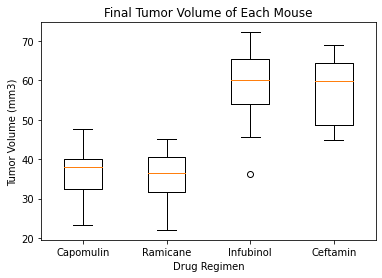

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

#tumor_volume = top_four_regimen_grouped["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin_df["Tumor Volume (mm3)"], ramicane_df["Tumor Volume (mm3)"], infubinol_df["Tumor Volume (mm3)"], ceftamin_df["Tumor Volume (mm3)"]], labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
ax1.set_xlabel('Drug Regimen')
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show()
plt.savefig("../Images/BoxPlot.png")

## Line and Scatter Plots

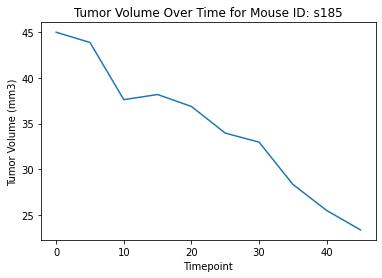

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
capomulin_total_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin",:]
single_mouse_df = capomulin_total_df.loc[capomulin_total_df["Mouse ID"] == "s185",:]
single_mouse_df
x_axis = single_mouse_df["Timepoint"]
y_axis = single_mouse_df["Tumor Volume (mm3)"]

plt.title("Tumor Volume Over Time for Mouse ID: s185")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
#capomulin_total_df
plt.savefig("../Images/LineChart.png")

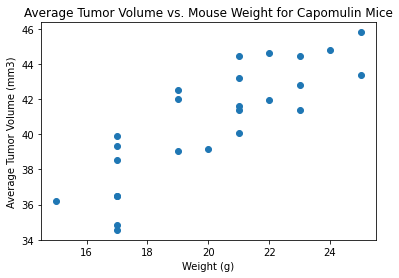

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_avg = capomulin_total_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Mice")
plt.show()
plt.savefig("../Images/ScatterPlot1.png")

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84
Linear Regression details: Slope = 0.9544396890241045, Intercept = 21.552160532685015, R-Value = 0.8419363424694718, P-Value = 1.3225722434712642e-07, Standard Deviation = 0.1275435903320134


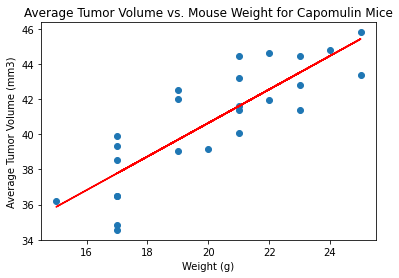

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {correlation}")

#reference from instructer example from class
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
print(f"Linear Regression details: Slope = {slope}, Intercept = {intercept}, R-Value = {rvalue}, P-Value = {pvalue}, Standard Deviation = {stderr}")
regress_values = capomulin_avg["Weight (g)"] * slope + intercept
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"],regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Mice")
plt.show()
plt.savefig("../Images/ScatterPlot2.png")

# Observations and Insights